Hi, we are Smart&Sexy team and we glad to present our research on how various factors affect life satisfaction level. enjoy :)


### start

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
pip install imbalanced-learn


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
df = pd.read_csv('/content/drive/MyDrive/data_life_satis.csv', index_col='Unnamed: 0')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2560 entries, 0 to 2559
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   life_satis         2560 non-null   float64
 1   age                2560 non-null   float64
 2   sex                2560 non-null   float64
 3   educ               2560 non-null   float64
 4   mar_st             2560 non-null   object 
 5   occupation         2560 non-null   object 
 6   vacation           2560 non-null   float64
 7   money              2560 non-null   float64
 8   fin_state_change   2560 non-null   float64
 9   fin_resp           2560 non-null   float64
 10  change_job         2560 non-null   float64
 11  social_media       2560 non-null   float64
 12  preg               2560 non-null   float64
 13  physical_activity  2560 non-null   float64
 14  alcohol            2560 non-null   float64
 15  smoker             2560 non-null   float64
 16  depression         2560 non-n

In [ ]:
df

,life_satis,age,sex,educ,mar_st,occupation,vacation,money,fin_state_change,fin_resp,...,social_media,preg,physical_activity,alcohol,smoker,depression,health,level_of_trust,num_of_children,is_religious
0,4.0,52.0,0.0,4.0,brak,worker,1.0,30000.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,1.0
1,4.0,44.0,0.0,6.0,gr_brak,worker,1.0,90000.0,4.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,1.0
2,2.0,57.0,0.0,4.0,brak,worker,0.0,45500.0,3.0,0.0,...,1.0,0.0,6.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0
3,4.0,51.0,1.0,4.0,brak,worker,0.0,38000.0,3.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0,1.0,1.0
4,3.0,39.0,1.0,3.0,single,worker,0.0,12800.0,3.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,2.0,26.0,0.0,6.0,divorced,worker,0.0,58000.0,4.0,0.0,...,1.0,0.0,2.0,1.0,0.0,0.0,4.0,1.0,1.0,1.0
2556,4.0,48.0,0.0,6.0,gr_brak,worker,1.0,68000.0,4.0,0.0,...,1.0,0.0,2.0,1.0,0.0,0.0,3.0,2.0,1.0,1.0
2557,4.0,45.0,0.0,6.0,divorced,doma_s_reb,0.0,26600.0,3.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,2.0
2558,4.0,59.0,0.0,6.0,brak,worker,1.0,36700.0,3.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,1.0,1.0


### Cleaning

In [ ]:
nan_columns = df.isna().sum()
nan_columns = nan_columns[nan_columns > 0].sort_values()

print("Columns with NaN values and their counts:")
print(nan_columns)

Columns with NaN values and their counts:
Series([], dtype: int64)


In [ ]:
df['occupation'].value_counts()

occupation
worker        2462
doma_s_reb      50
enterpren       38
dicret           7
student          3
Name: count, dtype: int64

In [93]:
df['occupation'].replace({'doma_s_reb':'dicret'}, inplace=True)

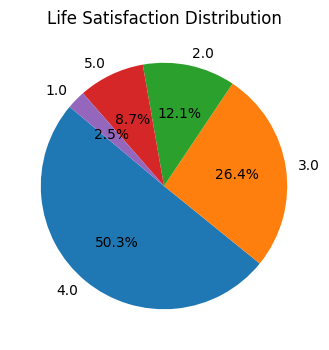

In [41]:
value_counts = df['life_satis'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Life Satisfaction Distribution')
plt.show()

In [94]:
df['life_satis'].replace({3: 2, 4: 3, 5: 2, 2: 1}, inplace=True)

In [64]:
df['life_satis'].replace({3: np.nan, 4: 2, 5: 2, 2 : 1}, inplace=True)

In [6]:
df = df.dropna()

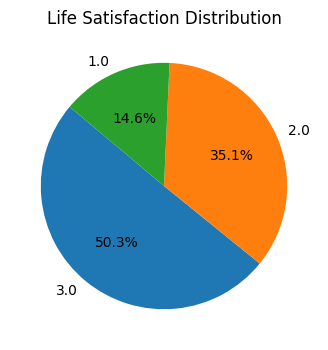

In [43]:
value_counts = df['life_satis'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Life Satisfaction Distribution')
plt.show()

### EDA

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'mar_st': ['brak' 'gr_brak' 'single' 'vdovets' 'divorced']
Unique values in 'occupation': ['worker' 'enterpren' 'doma_s_reb' 'student' 'dicret']


In [ ]:
for column in df.columns:
        unique_values = df[column].unique()
        if len(unique_values) < 10:
            print(f"Unique values '{column}': {unique_values}")

Unique values 'life_satis': [4. 2. 3. 5. 1.]
Unique values 'sex': [0. 1.]
Unique values 'educ': [4. 6. 3. 5. 2. 1.]
Unique values 'mar_st': ['brak' 'gr_brak' 'single' 'vdovets' 'divorced']
Unique values 'occupation': ['worker' 'enterpren' 'doma_s_reb' 'student' 'dicret']
Unique values 'vacation': [1. 0.]
Unique values 'fin_state_change': [3. 4. 2. 5. 1.]
Unique values 'fin_resp': [0. 1.]
Unique values 'change_job': [0. 1.]
Unique values 'social_media': [1. 0.]
Unique values 'preg': [0. 1.]
Unique values 'physical_activity': [0. 6. 4. 1. 3. 2.]
Unique values 'alcohol': [0. 1.]
Unique values 'smoker': [0. 1.]
Unique values 'depression': [0. 1.]
Unique values 'health': [3. 4. 2. 5.]
Unique values 'level_of_trust': [2. 1. 3.]
Unique values 'num_of_children': [1. 0.]
Unique values 'is_religious': [1. 2. 0.]


In [ ]:
df = df.loc[lambda x: x.money <= 123000]
df = df.loc[lambda x: x.money > 0]

In [ ]:
# Summary statistics for numerical features
summary_statistics = df.describe()

summary_statistics


,Unnamed: 0,life_satis,age,sex,educ,vacation,money,fin_state_change,fin_resp,change_job,social_media,preg,physical_activity,alcohol,smoker,depression,health,level_of_trust,num_of_children,is_religious
count,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000
mean,1277.555866,3.502394,41.961293,0.470072,4.999202,0.707103,36092.332953,2.772945,0.009577,0.146449,0.855148,0.002793,0.806464,0.635674,0.343575,0.057462,3.499601,1.817638,0.771748,1.132482
std,738.261246,0.905183,11.448980,0.499203,1.003785,0.455182,19621.597758,0.750730,0.097412,0.353626,0.352022,0.052788,1.639232,0.481337,0.474996,0.232770,0.564590,0.741057,0.419790,0.530136
min,0.000000,1.000000,18.000000,0.000000,1.000000,0.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
25%,641.250000,3.000000,33.000000,0.000000,4.000000,0.000000,22200.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000
50%,1275.500000,4.000000,41.000000,0.000000,5.000000,1.000000,30250.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,1.000000
75%,1914.750000,4.000000,50.000000,1.000000,6.000000,1.000000,45000.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,1.000000,1.000000
max,2559.000000,5.000000,87.000000,1.000000,6.000000,1.000000,121000.000000,5.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,5.000000,3.000000,1.000000,2.000000


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 5.1 MB/s eta 0:00:00


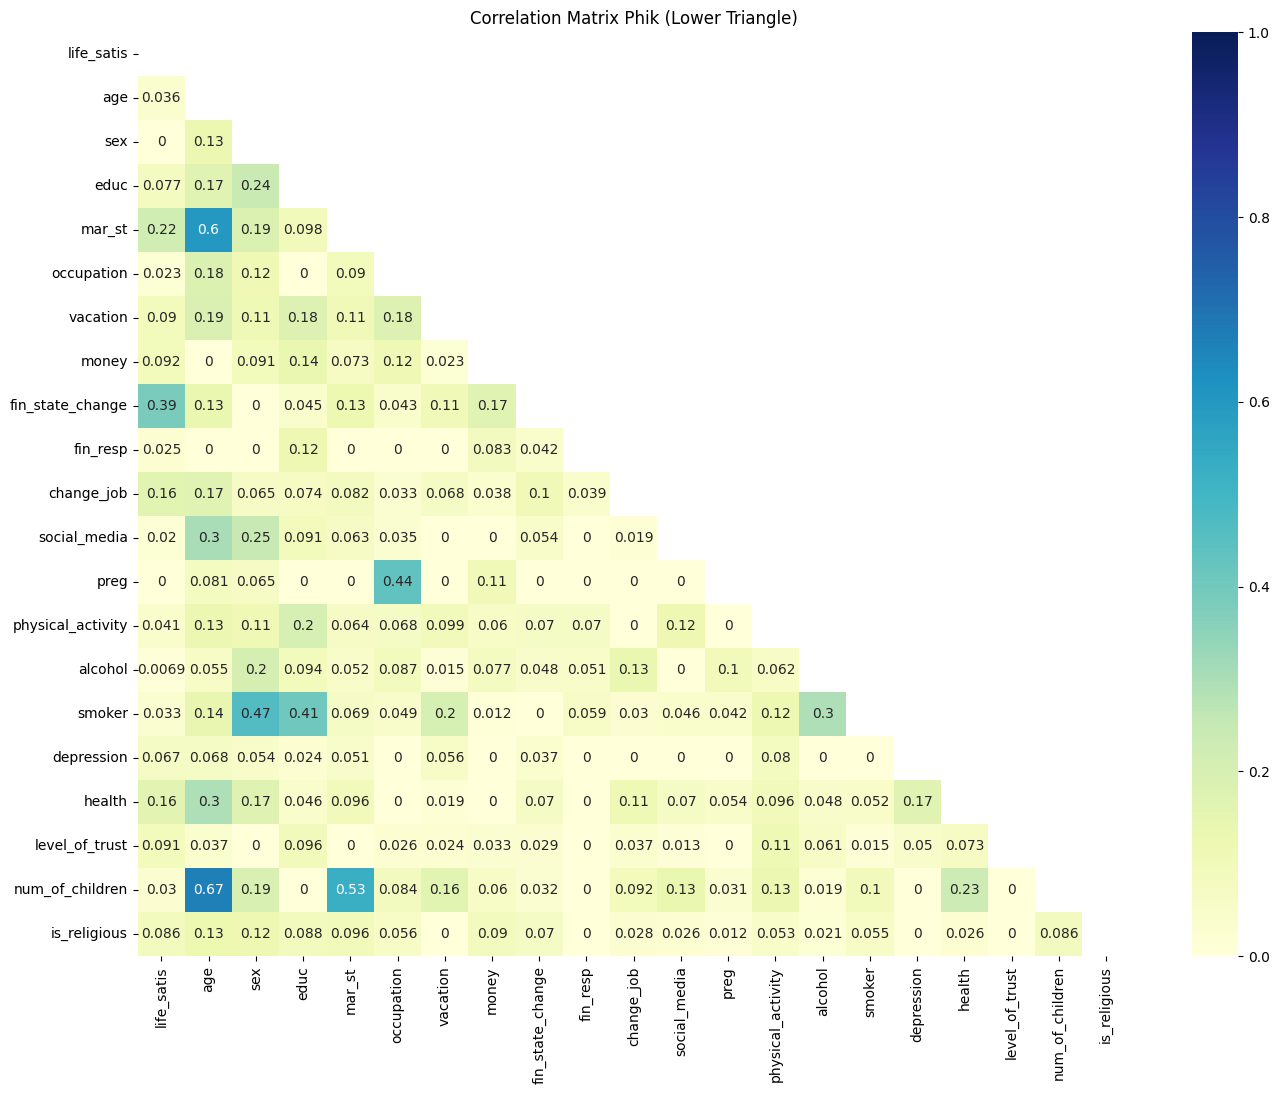

In [ ]:
!pip install phik
import phik
from phik.report import plot_correlation_matrix
import numpy as np
import matplotlib.pyplot as plt
import io

cols = df.columns

output = io.StringIO()

phik_overview = df[cols].phik_matrix(verbose=False)
corr_matrix = phik_overview.round(2)

mask = np.triu(np.ones_like(phik_overview.values, dtype=bool))

plt.figure(figsize=(16, 12))
plot = sns.heatmap(phik_overview, mask=mask, cmap='YlGnBu', annot=True, vmin=0, vmax=1)

plot.set_title('Correlation Matrix Phik (Lower Triangle)')
plt.show()


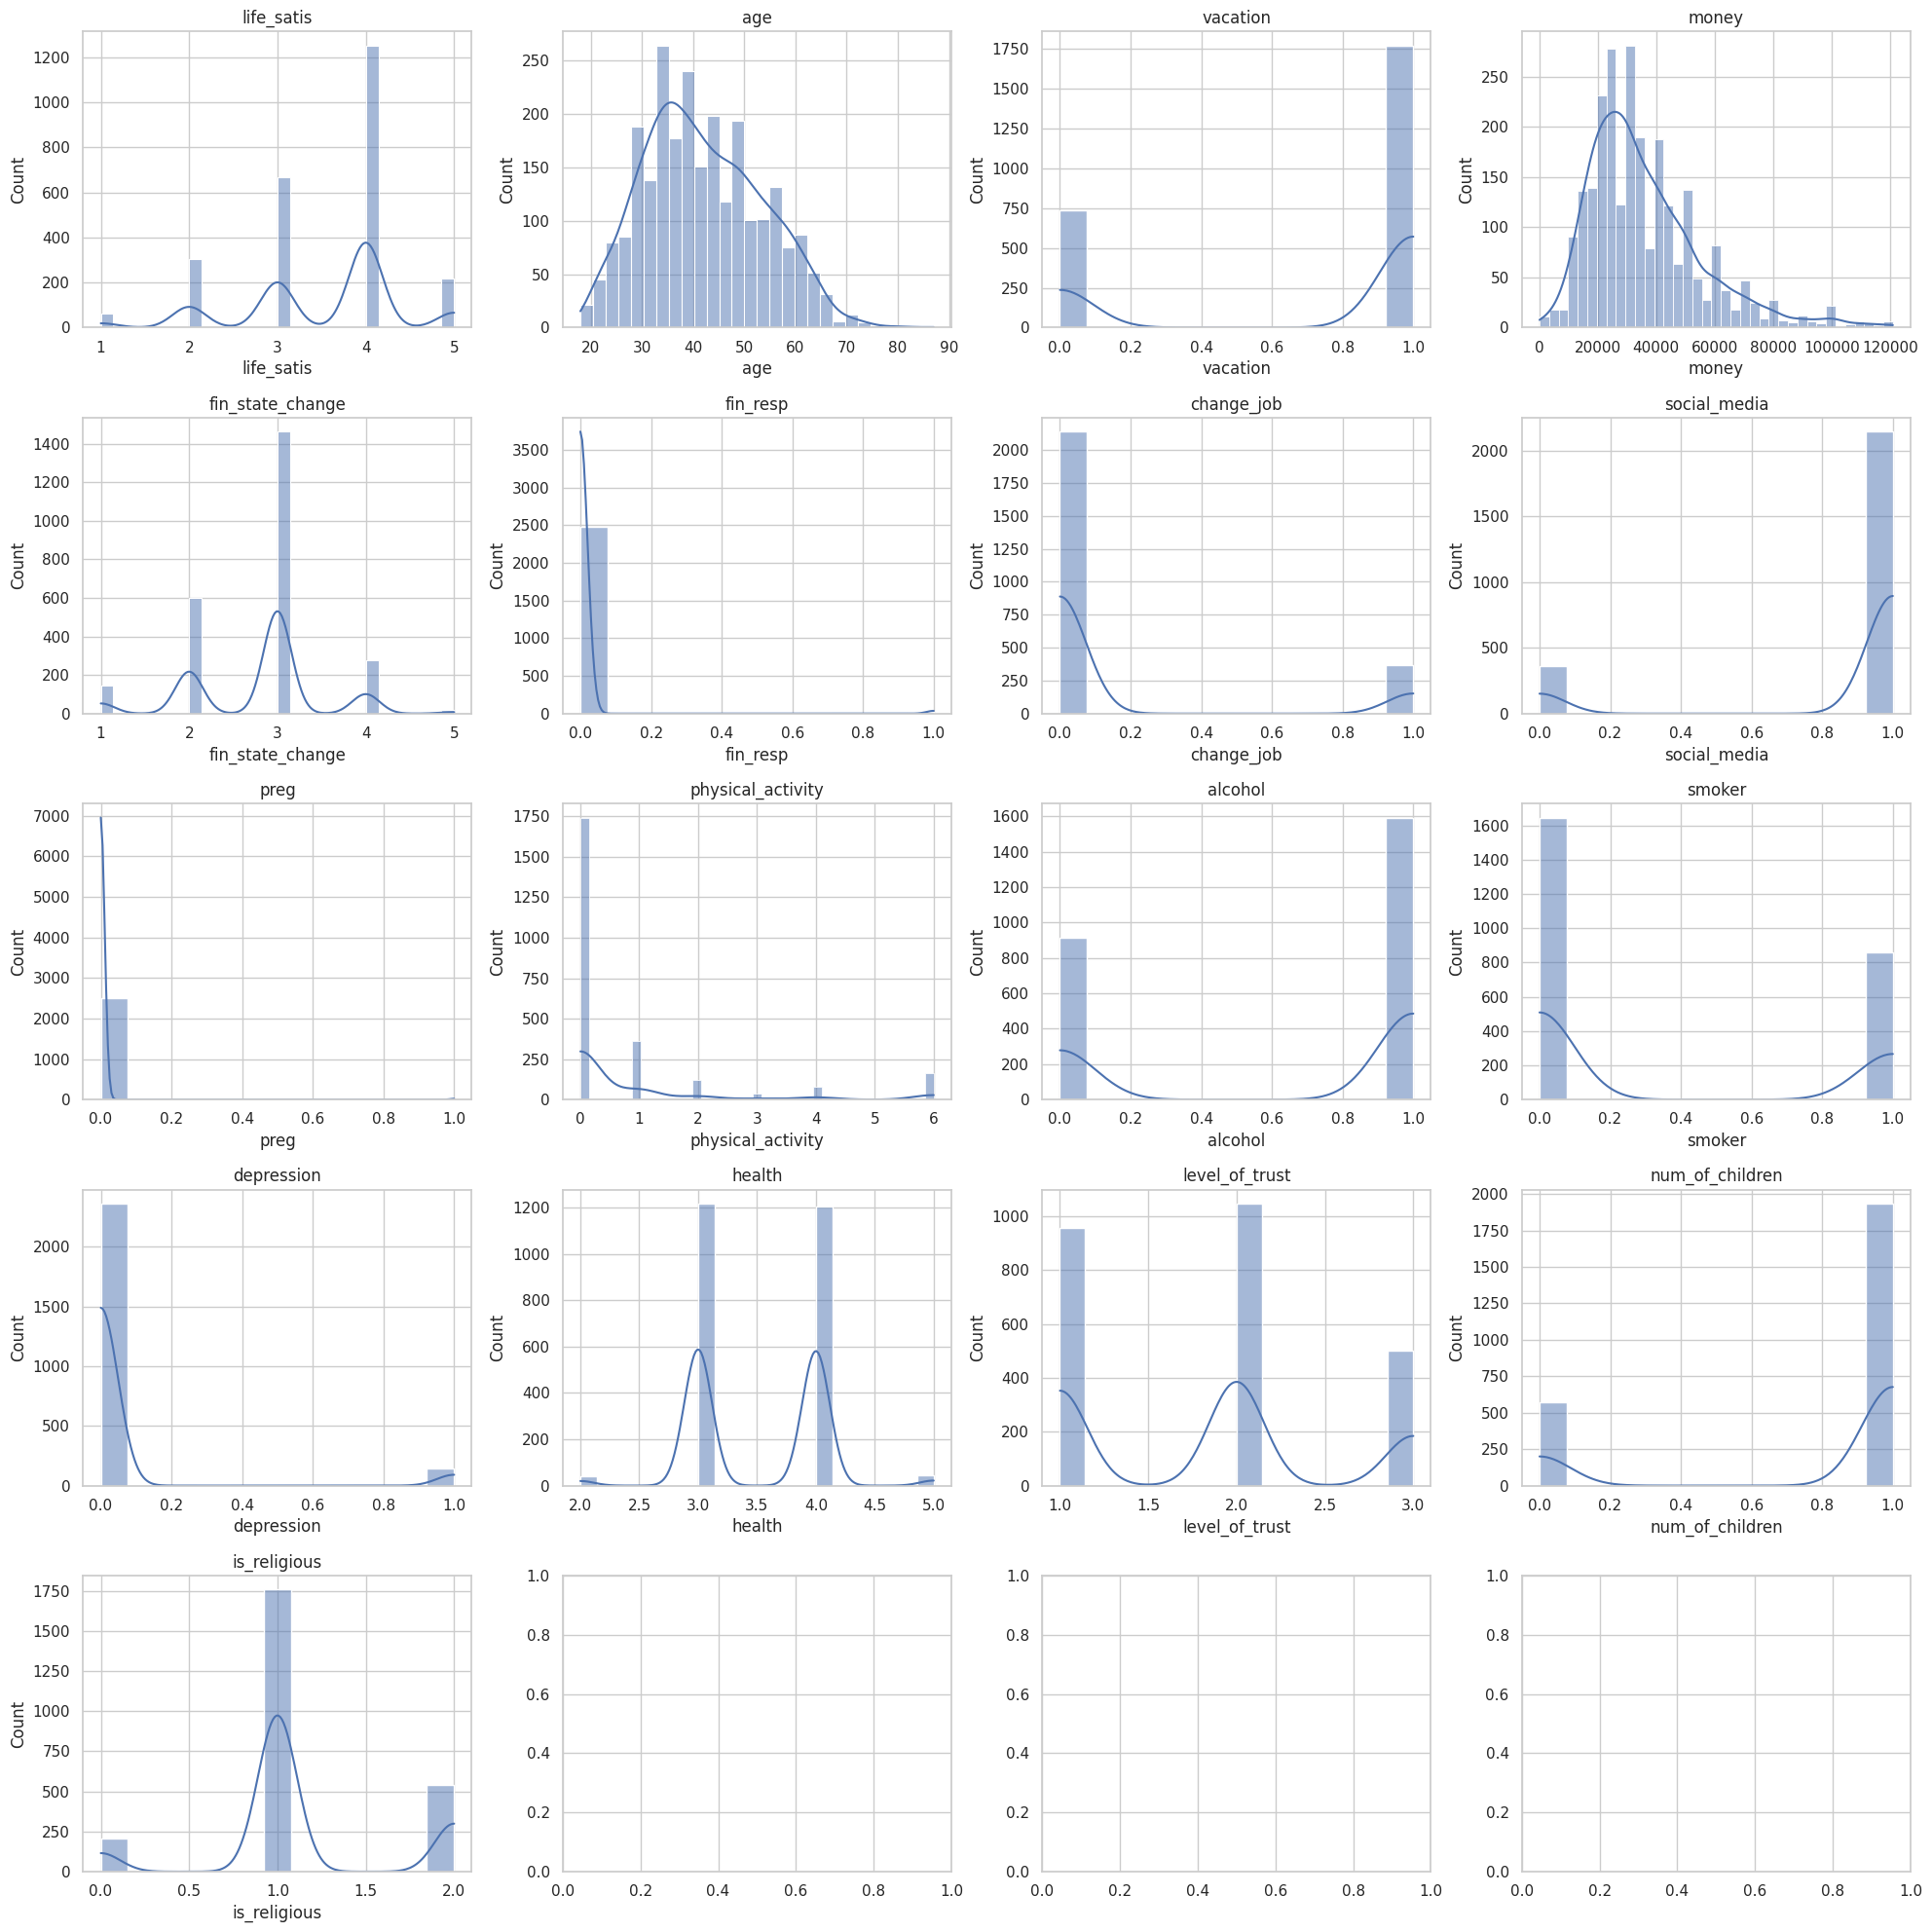

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Numerical columns to visualize
num_cols = [
    'life_satis', 'age', 'vacation', 'money', 'fin_state_change', 'fin_resp',
    'change_job', 'social_media', 'preg', 'physical_activity', 'alcohol', 'smoker',
    'depression', 'health', 'level_of_trust', 'num_of_children', 'is_religious'
]

# Create histograms for numerical columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[idx])
    axes[idx].set_title(col)

plt.tight_layout()
plt.show()

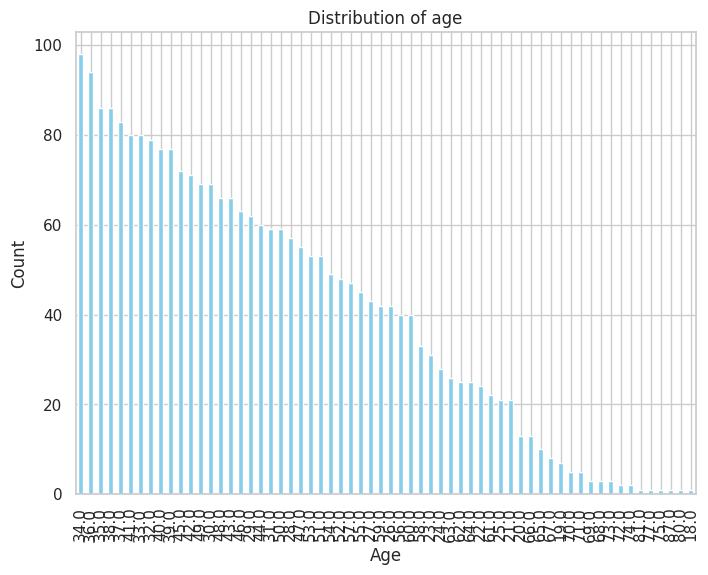

In [ ]:
plt.figure(figsize=(8, 6))
df['age'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

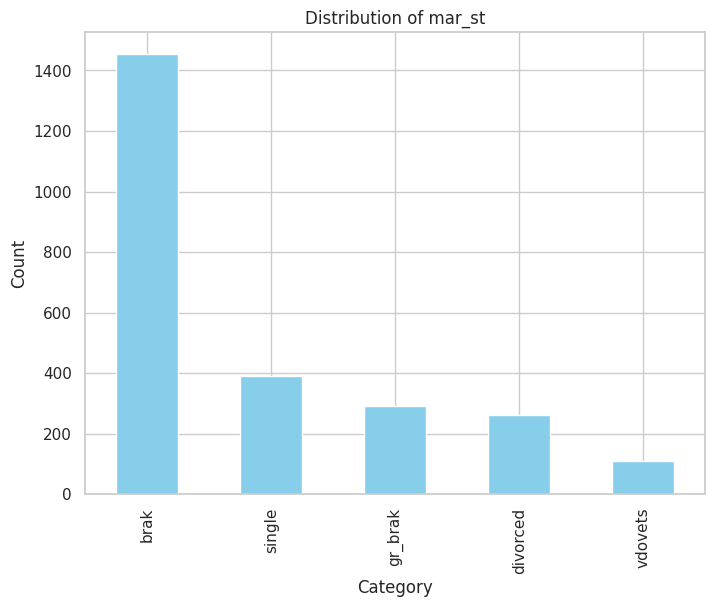

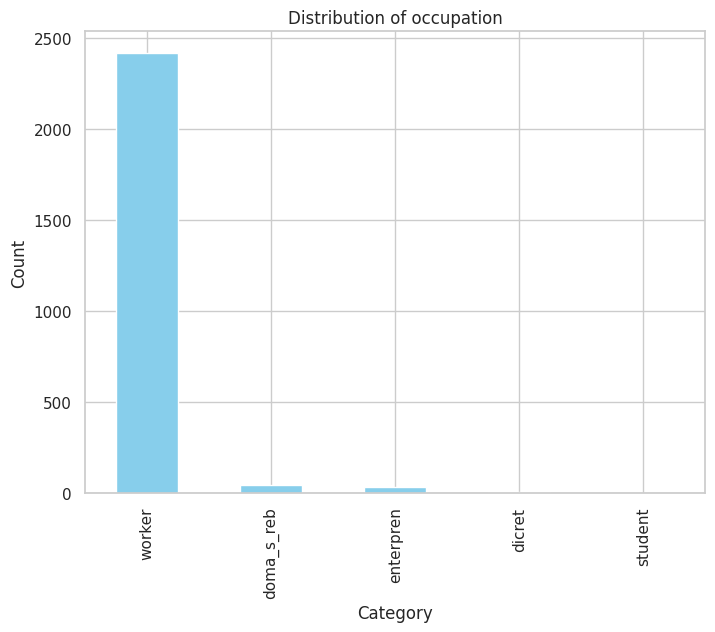

In [ ]:
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

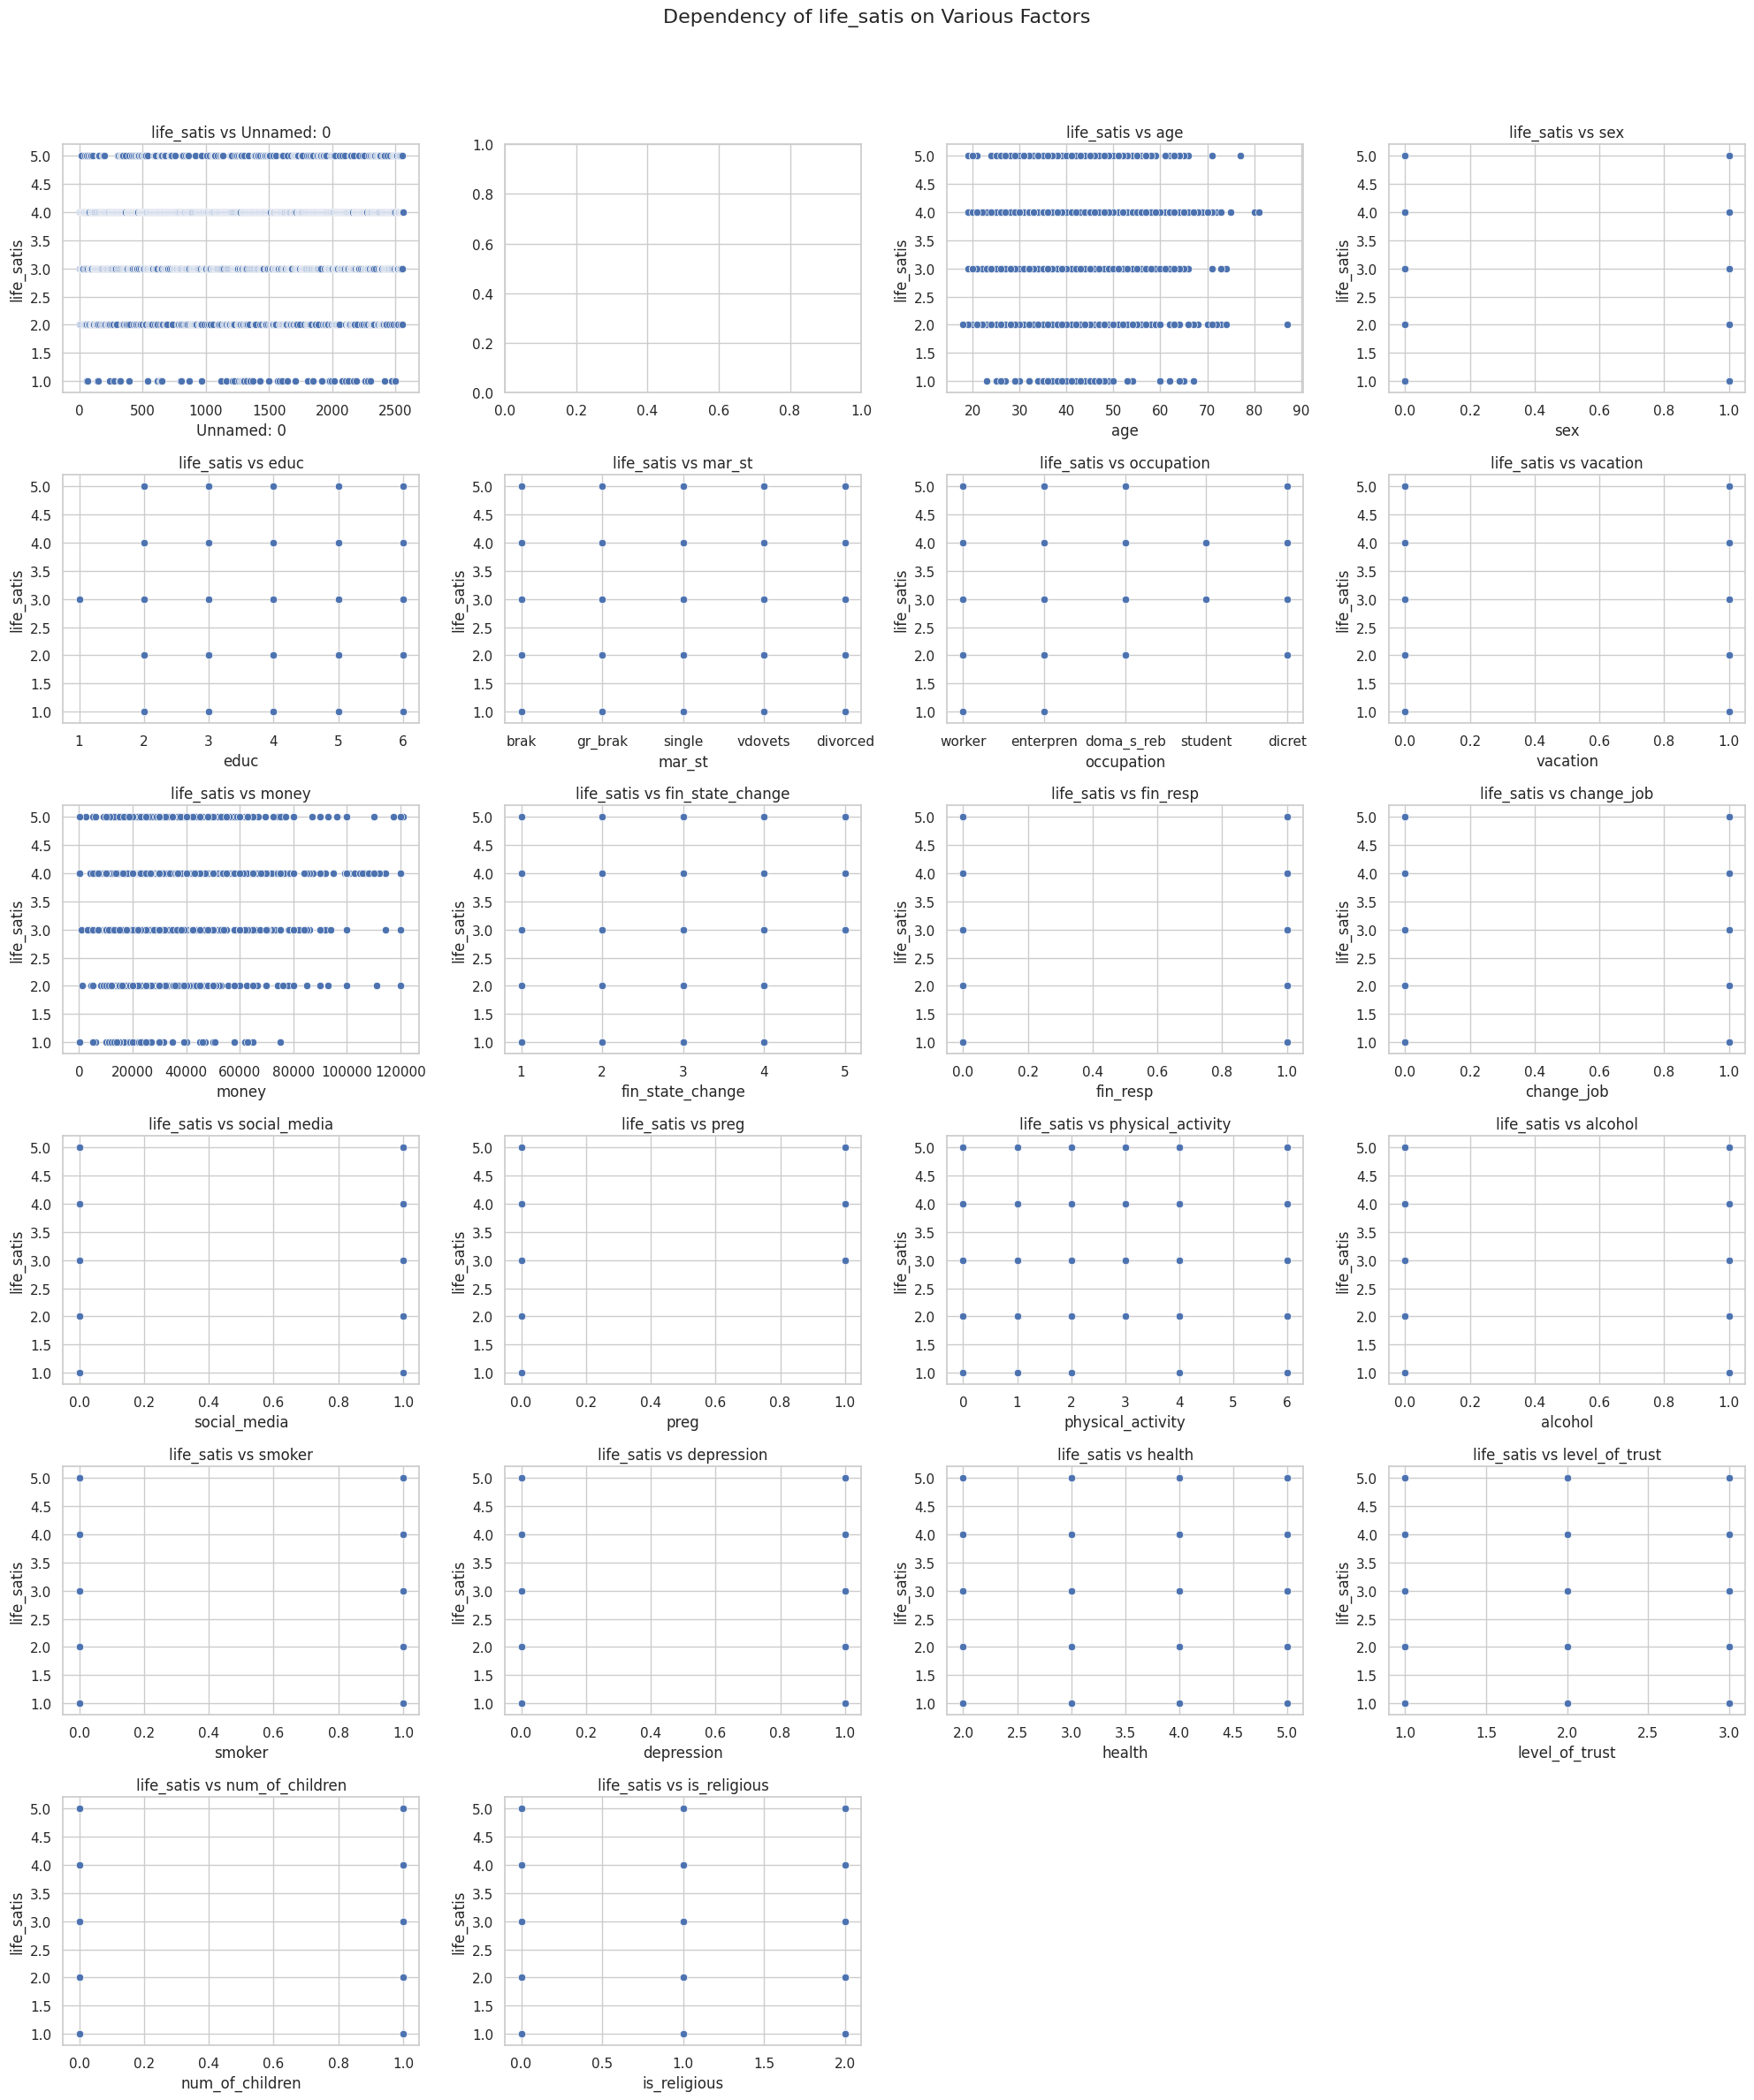

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 25))
fig.suptitle('Dependency of life_satis on Various Factors', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(df.columns):
    if col != 'life_satis':
        sns.scatterplot(x=df[col], y=df['life_satis'], ax=axes[i])
        axes[i].set_title(f'life_satis vs {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

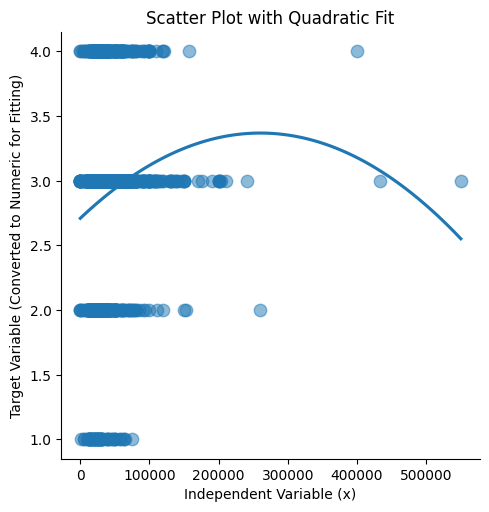

In [ ]:
sns.lmplot(x='money', y='life_satis', data=df, order=2, ci=None, scatter_kws={"s": 80, "alpha": 0.5})
plt.title('Scatter Plot with Quadratic Fit')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Target Variable (Converted to Numeric for Fitting)')
plt.show()

so we decided to add squared term for money

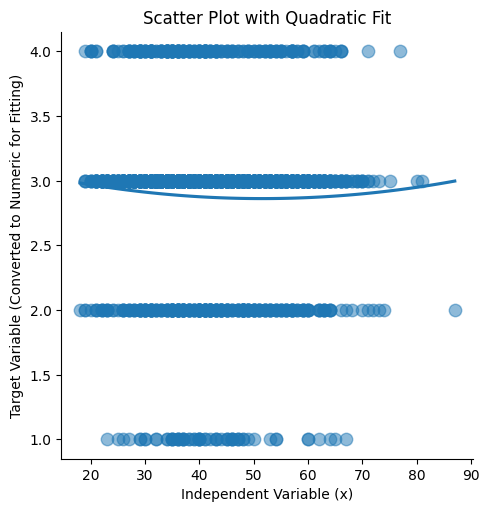

In [ ]:
sns.lmplot(x='age', y='life_satis', data=df, order=2, ci=None, scatter_kws={"s": 80, "alpha": 0.5})
plt.title('Scatter Plot with Quadratic Fit')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Target Variable (Converted to Numeric for Fitting)')
plt.show()

weak pattern, so we leave all as it was


*   threshole <= 0.02
 *  sex, alcohol, preg, socia_media
 * num_of_children due to multicol
*   threshole <= 0.03
 *  sex, alcohol, preg, socia_media, fin_resp, occupation, num_of_children



Mean: 41.89, Standard Deviation: 11.41
Lower Bound: 7.65, Upper Bound: 76.14
Number of Outliers: 4


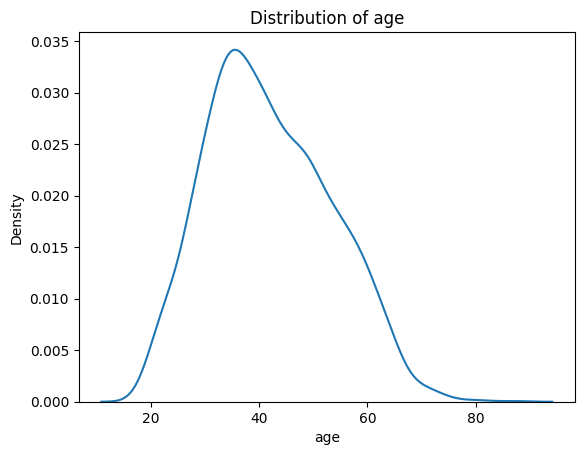

In [ ]:
#3 sigma selection for original

data = df['age']

mean = np.mean(data)
std = np.std(data)

lower_bound = mean - 3*std
upper_bound = mean + 3*std
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print(f"Mean: {mean:.2f}, Standard Deviation: {std:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {len(outliers)}")

# Create density plot
sns.kdeplot(data=df, x="age")

plt.xlabel("age")
plt.ylabel("Density")
plt.title("Distribution of age")

plt.show()


Mean: 36092.33, Standard Deviation: 19617.68
Lower Bound: -22760.71, Upper Bound: 94945.38
Number of Outliers: 48


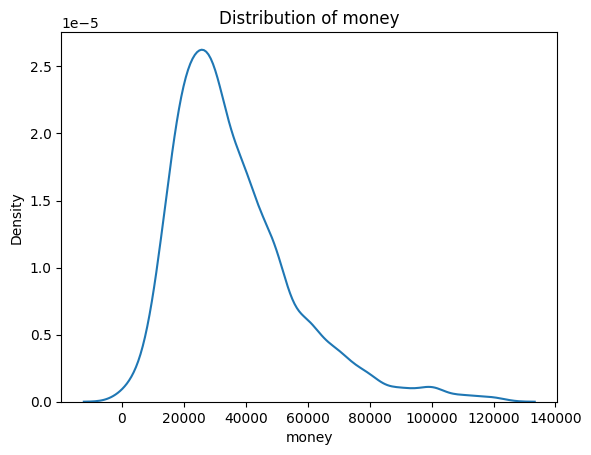

In [ ]:
#3 sigma selection for original

data = df['money']

mean = np.mean(data)
std = np.std(data)

lower_bound = mean - 3*std
upper_bound = mean + 3*std
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print(f"Mean: {mean:.2f}, Standard Deviation: {std:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {len(outliers)}")

# Create density plot
sns.kdeplot(data=df, x="money")

plt.xlabel("money")
plt.ylabel("Density")
plt.title("Distribution of money")

plt.show()

In [95]:
df = df.loc[lambda x: x.money <= 123000]

In [96]:
df = df.loc[lambda x: x.money > 0]

In [ ]:
for col in df.columns:
  a = df[col].value_counts()
  display(a)
  print('\n')

life_satis
3.0    1509
2.0     677
1.0     374
Name: count, dtype: int64

age
34.0    101
36.0     95
38.0     88
35.0     86
37.0     85
       ... 
77.0      1
75.0      1
87.0      1
80.0      1
18.0      1
Name: count, Length: 62, dtype: int64

sex
2.0    1354
1.0    1206
Name: count, dtype: int64

educ
6.0    1051
5.0     675
4.0     655
3.0     149
2.0      29
1.0       1
Name: count, dtype: int64

mar_st
2.0    1485
1.0     401
3.0     297
4.0     248
5.0     112
6.0      17
Name: count, dtype: int64

occupation
12.0    2462
6.0       50
11.0      38
5.0        7
16.0       3
Name: count, dtype: int64

vacation
1.0    1804
0.0     756
Name: count, dtype: int64

money
30000.0    198
40000.0    142
25000.0    136
20000.0    136
35000.0    112
          ... 
22770.0      1
93000.0      1
29900.0      1
307.0        1
36700.0      1
Name: count, Length: 489, dtype: int64

fin_state_change
3.0    1489
2.0     612
4.0     283
1.0     148
5.0      28
Name: count, dtype: int64

fin_resp
0.0    2535
1.0      25
Name: count, dtype: int64

change_job
0.0    2185
1.0     375
Name: count, dtype: int64

social_media
1.0    2192
0.0     368
Name: count, dtype: int64

preg
0.0    2552
1.0       8
Name: count, dtype: int64

physical_activity
0.0    1778
1.0     369
6.0     165
2.0     124
4.0      86
3.0      38
Name: count, dtype: int64

alcohol
1.0    1628
0.0     932
Name: count, dtype: int64

smoker
0.0    1681
1.0     879
Name: count, dtype: int64

depression
0.0    2413
1.0     147
Name: count, dtype: int64

health
3.0    1240
4.0    1231
5.0      48
2.0      41
Name: count, dtype: int64

level_of_trust
2.0    1068
1.0     984
3.0     508
Name: count, dtype: int64

num_of_children
1.0    1979
0.0     581
Name: count, dtype: int64

is_religious
1.0    1787
2.0     557
0.0     216
Name: count, dtype: int64

In [97]:
df['occupation'].replace({5: 'dicret', 6: 'doma_s_reb', 11: 'enterpren', 12: 'worker', 16: 'student'}, inplace=True)

In [98]:
df['mar_st'].replace({1: 'single', 2: 'brak', 3: 'gr_brak', 4: 'divorced', 5: 'vdovets', 6: 'not_live_together' }, inplace=True)

In [99]:
df['money'] = df['money'] / 1000  # scaling factor

In [100]:
df['money_sq'] = df['money']**2

In [101]:
df = pd.get_dummies(df, columns = ['occupation', 'mar_st'], drop_first=True)

In [102]:
df = df.astype(int)

In [103]:
tX, tY = df.drop('life_satis', axis=1), df.life_satis
tX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2506 entries, 0 to 2559
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   2506 non-null   int64
 1   sex                   2506 non-null   int64
 2   educ                  2506 non-null   int64
 3   vacation              2506 non-null   int64
 4   money                 2506 non-null   int64
 5   fin_state_change      2506 non-null   int64
 6   fin_resp              2506 non-null   int64
 7   change_job            2506 non-null   int64
 8   social_media          2506 non-null   int64
 9   preg                  2506 non-null   int64
 10  physical_activity     2506 non-null   int64
 11  alcohol               2506 non-null   int64
 12  smoker                2506 non-null   int64
 13  depression            2506 non-null   int64
 14  health                2506 non-null   int64
 15  level_of_trust        2506 non-null   int64
 16  num_of_chil

In [104]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
tX_r, tY_r = smote.fit_resample(tX, tY)

print("Original class distribution:", Counter(tY))
print("Resampled class distribution:", Counter(tY_r))

Original class distribution: Counter({3: 1252, 2: 886, 1: 368})
Resampled class distribution: Counter({3: 1252, 1: 1252, 2: 1252})


In [ ]:
'''
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
tX_ru, tY_ru = rus.fit_resample(tX, tY)

# Display new class distribution
print("Original class distribution:", Counter(tY))
print("Resampled class distribution:", Counter(tY_ru))
'''


Original class distribution: Counter({2: 1471, 1: 368})
Resampled class distribution: Counter({1: 368, 2: 368})


In [ ]:
tX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1883 entries, 0 to 2559
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   1883 non-null   int64
 1   sex                   1883 non-null   int64
 2   educ                  1883 non-null   int64
 3   vacation              1883 non-null   int64
 4   money                 1883 non-null   int64
 5   fin_state_change      1883 non-null   int64
 6   fin_resp              1883 non-null   int64
 7   change_job            1883 non-null   int64
 8   social_media          1883 non-null   int64
 9   preg                  1883 non-null   int64
 10  physical_activity     1883 non-null   int64
 11  alcohol               1883 non-null   int64
 12  smoker                1883 non-null   int64
 13  depression            1883 non-null   int64
 14  health                1883 non-null   int64
 15  level_of_trust        1883 non-null   int64
 16  num_of_chil

In [105]:
from sklearn.model_selection import train_test_split

tX_train, tX_valid, tY_train, tY_valid = (
    train_test_split(tX_r, tY_r, test_size=0.2, random_state=12000)
)

In [ ]:
tY_train.value_counts()

life_satis
2    1045
3    1042
1    1026
4    1005
Name: count, dtype: int64

In [19]:
import statsmodels.api as sm
from statsmodels.api import OLS

X = sm.add_constant(tX_train)
OLS(tY_train,X).fit(cov_type='HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             life_satis   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     112.7
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        18:53:32   Log-Likelihood:                -1074.4
No. Observations:                2353   AIC:                             2203.
Df Residuals:                    2326   BIC:                             2358.
Df Model:                          26                                         
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3621      0.080     -4.524      0.000      -0.519      -0.205
age                     -0.0002      0.001     -0.250      0.802      -0.002       0.002
sex                      0.0919      0.019      4.794      0.000       0.054       0.130
educ                     0.0555      0.009      5.959      0.000       0.037       0.074
vacation                 0.1408      0.018      7.690      0.000       0.105       0.177
money                    0.0048      0.001      3.172      0.002       0.002       0.008
fin_state_change         0.1834      0.010     18.258      0.000       0.164       0.203
fin_resp                -0.1045      0.083     -1.259      0.208      -0.267       0.058
change_job              -0.0865      0.029     -2.966      0.003      -0.144      -0.029
social_media             0.0540      0.020      2.702      0.007       0.015       0.093
preg                     0.2905      0.071      4.083      0.000       0.151       0.430
physical_activity       -0.0030      0.005     -0.608      0.543      -0.013       0.007
alcohol                  0.0561      0.018      3.184      0.001       0.022       0.091
smoker                   0.0668      0.019      3.448      0.001       0.029       0.105
depression               0.0394      0.047      0.833      0.405      -0.053       0.132
health                   0.1605      0.016      9.732      0.000       0.128       0.193
level_of_trust           0.0777      0.012      6.631      0.000       0.055       0.101
num_of_children          0.2070      0.019     10.728      0.000       0.169       0.245
is_religious             0.0462      0.017      2.643      0.008       0.012       0.080
money_sq              -3.06e-05   1.42e-05     -2.152      0.031   -5.85e-05   -2.73e-06
occupation_enterpren     0.1154      0.097      1.188      0.235      -0.075       0.306
occupation_student       0.2177      7.875      0.028      0.978     -15.217      15.653
occupation_worker       -0.0851      0.040     -2.142      0.032      -0.163      -0.007
mar_st_divorced          0.0472      0.036      1.302      0.193      -0.024       0.118
mar_st_gr_brak           0.0841      0.036      2.364      0.018       0.014       0.154
mar_st_single            0.1672      0.029      5.752      0.000       0.110       0.224
mar_st_vdovets           0.0805      0.055      1.474      0.140      -0.027       0.188
==============================================================================
Omnibus:                       60.879   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.954
Skew:                          -0.181   Prob(JB):                     3.48e-09
Kurtosis:                       2.484   Cond. No.                     1.23e+05
==================

### Ramsey

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(tX_train)

model = sm.OLS(tY_train, X).fit()

squared_features = tX_train.iloc[:, 1:]**2

tX_test = pd.concat([tX_train, squared_features], axis=1)

reset_test_results = sm.stats.diagnostic.linear_reset(model, power=2)


print("Ramsey RESET Test p-value", reset_test_results.pvalue)
print("Ramsey RESET Test F-statistic", reset_test_results.statistic)


Ramsey RESET Test p-value 0.19395470370598522
Ramsey RESET Test F-statistic 1.687319436120815


We accept H0 so based on the Ramsey RESET test result alone, we would conclude that there is no significant indication of omitted variables or incorrect functional form




### LR test



*   threshole <= 0.02
 *  sex, alcohol, preg, socia_media
 * num_of_children due to multicol
*   threshole <= 0.03
 *  sex, alcohol, preg, socia_media, fin_resp, occupation, num_of_children



In [ ]:
tX_train_red = tX_train.drop(columns= ['sex', 'alcohol', 'preg', 'social_media', 'num_of_children'], axis = 0)

In [ ]:
from scipy.stats import chi2
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

full_model = OrderedModel(tY_train,
                        tX_train,
                        distr='logit')
full_result = full_model.fit(method='bfgs', disp=False)

reduced_model = OrderedModel(tY_train,
                        tX_train_red,
                        distr='logit')
reduced_result = reduced_model.fit(method='bfgs', disp=False)


lr_stat = -2 * (reduced_result.llf - full_result.llf)
lr_df = full_result.df_model - reduced_result.df_model
lr_pvalue = chi2.sf(lr_stat, lr_df)
print(f"LR Statistic: {lr_stat}")
print(f"Degrees of Freedom: {lr_df}")
print(f"p-value: {lr_pvalue}\n\n")
if lr_pvalue > 0.05:
    display(HTML('<strong>we accept h0 -> restricted model is better</strong><br><br>'))
else:
    display(HTML('<strong>we reject h0 -> full model is better</strong><br><br>'))


LR Statistic: 3.640935398999318
Degrees of Freedom: 5
p-value: 0.6021776921285329




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print("AIC for Full Model:", full_result.aic)
print("AIC for Restricted Model:", reduced_result.aic)

AIC for Full Model: 1235.6407318334273
AIC for Restricted Model: 1248.697087909985


In [ ]:
tX_train_red = tX_train.drop(columns= ['sex', 'alcohol', 'preg', 'social_media', 'fin_resp', 'occupation_worker','occupation_student', 'occupation_enterpren', 'num_of_children'], axis = 0)

In [ ]:
from scipy.stats import chi2
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

full_model = OrderedModel(tY_train,
                        tX_train,
                        distr='logit')
full_result = full_model.fit(method='bfgs', disp=False)  # disp=0 turns off the fitting messages

# Reduced model without one of the predictors, e.g., without 'X3'
reduced_model = OrderedModel(tY_train,
                        tX_train_red,
                        distr='logit')
reduced_result = reduced_model.fit(method='bfgs', disp=False)

# Perform the Likelihood Ratio Test
lr_stat = -2 * (reduced_result.llf - full_result.llf)  # Log likelihood of reduced model - log likelihood of full model
lr_df = full_result.df_model - reduced_result.df_model  # Difference in degrees of freedom between models
lr_pvalue = chi2.sf(lr_stat, lr_df)
print(f"LR Statistic: {lr_stat}")
print(f"Degrees of Freedom: {lr_df}")
print(f"p-value: {lr_pvalue}\n\n")
if lr_pvalue > 0.05:
    display(HTML('<strong>we accept h0 -> restricted model is better</strong><br><br>'))
else:
    display(HTML('<strong>we reject h0 -> full model is better</strong><br><br>'))


LR Statistic: 20.278257139774723
Degrees of Freedom: 9
p-value: 0.01627071802849044




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**we should drop**

*   sex
*   alcohol
*   preg
*   social_media
*   num_of_children

### VIF

In [20]:
vif_data = pd.DataFrame()
df1 = df.drop(columns='life_satis', axis=0)
vif_data['Variable'] = df1.columns
vif_data['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

print(vif_data)

                Variable        VIF
0                    age  19.438346
1                    sex   2.637251
2                   educ  26.875912
3               vacation   4.059978
4                  money  58.393545
5       fin_state_change  15.299505
6               fin_resp   1.041015
7             change_job   1.219662
8           social_media   6.833318
9                   preg   1.041262
10     physical_activity   1.312977
11               alcohol   3.153961
12                smoker   1.900183
13            depression   1.088465
14                health  33.960074
15        level_of_trust   7.069250
16       num_of_children   8.025539
17          is_religious   5.957620
18              money_sq  21.487555
19  occupation_enterpren   1.587747
20    occupation_student   1.049437
21     occupation_worker  41.142544
22       mar_st_divorced   1.259047
23        mar_st_gr_brak   1.294266
24         mar_st_single   2.046684
25        mar_st_vdovets   1.211890


condcut F-test to decide whether to drop variables with VIF > 10:

*   Health
*   Fin_state_change
*   education




In [21]:
tX_train_short, tX_train_ext = tX_train.drop('educ', axis = 1), tX_train

X = sm.add_constant(tX_train_short)
model_original = sm.OLS(tY_train, X).fit()

Xe = sm.add_constant(tX_train_ext)
model_extended = sm.OLS(tY_train, Xe).fit()

f_test_results = model_extended.compare_f_test(model_original)

print("F-test p-value for overall significance for Education:", f_test_results)

F-test p-value for overall significance for Education: (37.1438039583827, 1.2807175506877758e-09, 1.0)


**We reject H0 -> education has significant effect***

In [22]:
tX_train_short, tX_train_ext = tX_train.drop('fin_state_change', axis = 1), tX_train

X = sm.add_constant(tX_train_short)
model_original = sm.OLS(tY_train, X).fit()

Xe = sm.add_constant(tX_train_ext)
model_extended = sm.OLS(tY_train, Xe).fit()

f_test_results = model_extended.compare_f_test(model_original)

print("F-test p-value for overall significance for change in financial state:", f_test_results)

F-test p-value for overall significance for change in financial state: (307.97864112812533, 7.555867046599982e-65, 1.0)


**We reject H0 -> change in financial state has significant effect***

In [23]:
tX_train_short, tX_train_ext = tX_train.drop('health', axis = 1), tX_train

X = sm.add_constant(tX_train_short)
model_original = sm.OLS(tY_train, X).fit()

Xe = sm.add_constant(tX_train_ext)
model_extended = sm.OLS(tY_train, Xe).fit()

f_test_results = model_extended.compare_f_test(model_original)

print("F-test p-value for overall significance for health:", f_test_results)

F-test p-value for overall significance for health: (102.9675386186859, 1.0531157919922708e-23, 1.0)


**We reject H0 -> health  has significant effect***

### Logit + Ordered Logit

In [36]:
import statsmodels.api as sm

X = sm.add_constant(tX_train)
mod_log = sm.Logit(tY_train, X)
res_log = mod_log.fit(method='bfgs', disp=False)
print(res_log.summary())

                           Logit Regression Results                           
Dep. Variable:             life_satis   No. Observations:                 2353
Model:                          Logit   Df Residuals:                     2326
Method:                           MLE   Df Model:                           26
Date:                Fri, 17 May 2024   Pseudo R-squ.:                  0.3391
Time:                        19:14:26   Log-Likelihood:                -1077.9
converged:                      False   LL-Null:                       -1630.9
Covariance Type:            nonrobust   LLR p-value:                1.101e-216
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.6198      0.611    -10.831      0.000      -7.818      -5.422
age                     -0.0185      0.006     -3.092      0.002      -0.030      -0.007
sex         

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
predicted_probabilities = res_log.predict(X)
predicted_classes = (predicted_probabilities > 0.5).astype(int)

accuracy = np.mean(predicted_classes == tY_train)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7918


In [38]:
tX_train = tX_train.drop(columns= ['sex', 'alcohol', 'preg', 'social_media', 'num_of_children'], axis = 0)

In [ ]:
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_log = OrderedModel(tY_train,
                        tX_train,
                        distr='logit')

res_log = mod_log.fit(method='bfgs', disp=False)
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:             life_satis   Log-Likelihood:                -305.11
Model:                   OrderedModel   AIC:                             654.2
Method:            Maximum Likelihood   BIC:                             750.5
Date:                Wed, 15 May 2024                                         
Time:                        17:30:02                                         
No. Observations:                 588                                         
Df Residuals:                     566                                         
Df Model:                          21                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                     -0.0193      0.010     -1.898      0.058      -0.039       0.001
educ                     0.0339      0.109      0.312      0.755      -0.179       0.247
vacation                 0.5068      0.233      2.179      0.029       0.051       0.963
money                    0.0646      0.018      3.569      0.000       0.029       0.100
fin_state_change         1.0257      0.144      7.148      0.000       0.744       1.307
fin_resp                -1.1280      0.897     -1.257      0.209      -2.886       0.630
change_job              -1.4352      0.285     -5.030      0.000      -1.994      -0.876
physical_activity       -0.0848      0.059     -1.435      0.151      -0.201       0.031
smoker                  -0.0078      0.223     -0.035      0.972      -0.444       0.429
depression              -0.2898      0.406     -0.714      0.475      -1.085       0.505
health                   0.4779      0.187      2.556      0.011       0.111       0.844
level_of_trust           0.3208      0.143      2.250      0.024       0.041       0.600
is_religious            -0.5010      0.189     -2.653      0.008      -0.871      -0.131
money_sq                -0.0004      0.000     -2.147      0.032      -0.001   -3.21e-05
occupation_enterpren    -1.6552      1.052     -1.573      0.116      -3.718       0.407
occupation_student            0   5.64e+07          0      1.000   -1.11e+08    1.11e+08
occupation_worker       -1.6266      0.727     -2.238      0.025      -3.051      -0.202
mar_st_divorced         -0.9503      0.321     -2.961      0.003      -1.579      -0.321
mar_st_gr_brak          -0.6832      0.334     -2.045      0.041      -1.338      -0.029
mar_st_single           -0.8154      0.298     -2.732      0.006      -1.400      -0.230
mar_st_vdovets          -0.8191      0.460     -1.781      0.075      -1.721       0.083
1/2                      3.3907      1.292      2.625      0.009       0.859       5.922
========================================================================================
"""

In [28]:
predicted = res_log.model.predict(res_log.params, exog=tX_train)
predicted

array([[0.02199098, 0.97800902],
       [0.06587272, 0.93412728],
       [0.35669748, 0.64330252],
       ...,
       [0.86091634, 0.13908366],
       [0.29964899, 0.70035101],
       [0.07552566, 0.92447434]])

In [29]:
from sklearn.metrics import accuracy_score

predicted_classes = np.argmax(predicted, axis=1) + 1

accuracy = accuracy_score(tY_train, predicted_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.49%


### Ordered Logit 2

In [106]:
tX_train = tX_train.drop(columns= ['sex', 'alcohol', 'preg', 'social_media', 'num_of_children'], axis = 0)

Model if we use the following distribution of life satisfaction : 1+2, 3, 4+5

In [107]:
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_log = OrderedModel(tY_train,
                        tX_train,
                        distr='logit')

res_log = mod_log.fit(method='bfgs', disp=False)
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:             life_satis   Log-Likelihood:                -2844.0
Model:                   OrderedModel   AIC:                             5734.
Method:            Maximum Likelihood   BIC:                             5872.
Date:                Fri, 17 May 2024                                         
Time:                        19:44:20                                         
No. Observations:                3004                                         
Df Residuals:                    2981                                         
Df Model:                          21                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                      0.0040      0.004      1.043      0.297      -0.003       0.011
educ                     0.2156      0.040      5.445      0.000       0.138       0.293
vacation                 0.7096      0.079      9.036      0.000       0.556       0.864
money                    0.0291      0.006      4.608      0.000       0.017       0.041
fin_state_change         0.8166      0.050     16.298      0.000       0.718       0.915
fin_resp                -0.7946      0.418     -1.900      0.057      -1.614       0.025
change_job              -0.1302      0.116     -1.120      0.263      -0.358       0.098
physical_activity       -0.0074      0.024     -0.301      0.764      -0.055       0.041
smoker                   0.3595      0.083      4.326      0.000       0.197       0.522
depression               0.1326      0.176      0.752      0.452      -0.213       0.478
health                   0.7230      0.072     10.071      0.000       0.582       0.864
level_of_trust           0.2710      0.052      5.185      0.000       0.169       0.373
is_religious             0.1372      0.071      1.938      0.053      -0.002       0.276
money_sq                -0.0002   6.09e-05     -3.258      0.001      -0.000   -7.91e-05
occupation_enterpren     0.3716      0.396      0.939      0.348      -0.404       1.147
occupation_student       0.8052      1.210      0.666      0.506      -1.566       3.177
occupation_worker       -0.1094      0.209     -0.523      0.601      -0.519       0.300
mar_st_divorced          0.2039      0.139      1.467      0.142      -0.068       0.476
mar_st_gr_brak           0.1660      0.133      1.246      0.213      -0.095       0.427
mar_st_single            0.0430      0.119      0.362      0.717      -0.190       0.276
mar_st_vdovets          -0.0489      0.216     -0.226      0.821      -0.473       0.375
1/2                      6.6495      0.421     15.797      0.000       5.824       7.474
2/3                      0.5648      0.029     19.609      0.000       0.508       0.621
========================================================================================
"""

In [108]:
predicted = res_log.model.predict(res_log.params, exog=tX_train)
predicted

array([[0.07653938, 0.24837127, 0.67508936],
       [0.03368095, 0.13464565, 0.8316734 ],
       [0.172807  , 0.37533472, 0.45185828],
       ...,
       [0.80299318, 0.15646894, 0.04053789],
       [0.11495544, 0.31499203, 0.57005253],
       [0.09493734, 0.28360046, 0.62146221]])

In [109]:
from sklearn.metrics import accuracy_score

predicted_classes = np.argmax(predicted, axis=1) + 1

accuracy = accuracy_score(tY_train, predicted_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 53.00%


##Chow test

In [ ]:
import statsmodels.api as sm
from scipy.stats import chi2

In [ ]:
# Function to perform the Chow test
def chow_test(data, split_value, y_var, x_vars):
    data1 = data[data[x_vars[0]] < split_value]
    data2 = data[data[x_vars[0]] >= split_value]

    model1 = sm.OLS(data1[y_var], sm.add_constant(data1[x_vars])).fit()
    model2 = sm.OLS(data2[y_var], sm.add_constant(data2[x_vars])).fit()
    model_full = sm.OLS(data[y_var], sm.add_constant(data[x_vars])).fit()

    SSR_pooled = model_full.ssr
    SSR1 = model1.ssr
    SSR2 = model2.ssr
    n1 = len(data1)
    n2 = len(data2)
    k = len(model_full.params)

    chow_stat = ((SSR_pooled - (SSR1 + SSR2)) / k) / ((SSR1 + SSR2) / (n1 + n2 - 2 * k))
    p_value = chi2.sf(chow_stat, k)

    return chow_stat, p_value

**Life Satisfaction (life_satis) vs. Income (money):**

H0: There is no structural break in the relationship between life satisfaction and income at the median income level


H1: There is a structural break in the relationship between life satisfaction and income at the median income level

In [ ]:
# Function to perform the Chow test for three groups
def chow_test_three_groups(data, y_var, x_var, split1, split2):
    # Split the data into three groups
    data1 = data[data[x_var] <= split1]
    data2 = data[(data[x_var] > split1) & (data[x_var] <= split2)]
    data3 = data[data[x_var] > split2]

    # Fit the model for each group
    model1 = sm.OLS(data1[y_var], sm.add_constant(data1[x_var])).fit()
    model2 = sm.OLS(data2[y_var], sm.add_constant(data2[x_var])).fit()
    model3 = sm.OLS(data3[y_var], sm.add_constant(data3[x_var])).fit()

    # Combine the data and fit the full model
    model_full = sm.OLS(data[y_var], sm.add_constant(data[x_var])).fit()

    # Calculate the F-statistic for the Chow test
    SSR_pooled = model_full.ssr
    SSR1 = model1.ssr
    SSR2 = model2.ssr
    SSR3 = model3.ssr
    n1 = len(data1)
    n2 = len(data2)
    n3 = len(data3)
    k = len(model_full.params)

    chow_stat = ((SSR_pooled - (SSR1 + SSR2 + SSR3)) / (2 * k)) / ((SSR1 + SSR2 + SSR3) / (n1 + n2 + n3 - 3 * k))
    p_value = chi2.sf(chow_stat, 2 * k)

    return chow_stat, p_value


In [ ]:
# Clean the data to ensure there are no missing values
data_clean_money = df[['life_satis', 'money']].dropna()

# Define the age splits for the groups
split1 = 22000
split2 = 45310

# Perform the Chow test for 'life_satis' vs. 'age' with three age groups
y_var = 'life_satis'
x_var = 'money'

# Perform the Chow test
chow_stat_money_groups, p_value_money_groups = chow_test_three_groups(data_clean_money, y_var, x_var, split1, split2)

print(f'Chow Test Statistic for life_satis vs. money groups: {chow_stat_money_groups}')
print(f'P-Value for life_satis vs. money groups: {p_value_money_groups}')

Chow Test Statistic for life_satis vs. money groups: 3.027765859252607
P-Value for life_satis vs. money groups: 0.5531896504311389


reject null hypothesis - there is structural break in the relationship between life satisfaction and income at the median income level

**Life Satisfaction (life_satis) vs. Age (age):**

H0: There is no structural break in the relationship between life satisfaction and age at the median age level


H1: There is a structural break in the relationship between life satisfaction and age at the median age level


In [ ]:
# Clean the data to ensure there are no missing values
data_clean_age = df[['life_satis', 'age']].dropna()

# Define the age splits for the groups
split1 = 30
split2 = 50

# Perform the Chow test for 'life_satis' vs. 'age' with three age groups
y_var = 'life_satis'
x_var = 'age'

# Perform the Chow test
chow_stat_age_groups, p_value_age_groups = chow_test_three_groups(data_clean_age, y_var, x_var, split1, split2)

print(f'Chow Test Statistic for life_satis vs. age groups: {chow_stat_age_groups}')
print(f'P-Value for life_satis vs. age groups: {p_value_age_groups}')

Chow Test Statistic for life_satis vs. age groups: 3.2442536242122
P-Value for life_satis vs. age groups: 0.5178130219939784


we fail to reject null hypothesis - there is no structural break in the relationship between life satisfaction and age at the median age level

## After Chow division

In [ ]:
df1 = df.loc[ lambda x: x.money < 22]
df2 = df[ (df['money'] >= 22) & (df['money'] < 45)]
df3 = df.loc[ lambda x: x.age >= 45]

In [ ]:
tX1, tY1 = df1.drop('life_satis', axis=1), df1.life_satis
tX2, tY2 = df2.drop('life_satis', axis=1), df2.life_satis
tX3, tY3 = df3.drop('life_satis', axis=1), df3.life_satis

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
tX_r, tY_r = smote.fit_resample(tX, tY)

# Display new class distribution
print("Original class distribution:", Counter(tY))
print("Resampled class distribution:", Counter(tY_r))

Original class distribution: Counter({2: 1471, 1: 368})
Resampled class distribution: Counter({2: 1471, 1: 1471})


In [ ]:
from sklearn.model_selection import train_test_split

tX_train1, tX_valid1, tY_train1, tY_valid1 = (
    train_test_split(tX1, tY1, test_size=0.2, random_state=12000)
)

tX_train2, tX_valid2, tY_train2, tY_valid2 = (
    train_test_split(tX2, tY2, test_size=0.2, random_state=12000)
)

tX_train3, tX_valid3, tY_train3, tY_valid3 = (
    train_test_split(tX3, tY3, test_size=0.2, random_state=12000)
)

In [ ]:
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_log1 = OrderedModel(tY_train1,
                        tX_train1,
                        distr='logit')

res_log1 = mod_log1.fit(method='bfgs', disp=False)

mod_log2 = OrderedModel(tY_train2,
                        tX_train2,
                        distr='logit')

res_log2 = mod_log2.fit(method='bfgs', disp=False)

mod_log3 = OrderedModel(tY_train3,
                        tX_train3,
                        distr='logit')

res_log3 = mod_log3.fit(method='bfgs', disp=False)

In [ ]:
predicted1 = res_log1.model.predict(res_log1.params, exog=tX_train1)
predicted2 = res_log2.model.predict(res_log2.params, exog=tX_train2)
predicted3 = res_log3.model.predict(res_log3.params, exog=tX_train3)

In [ ]:
from sklearn.metrics import accuracy_score

predicted_classes1 = np.argmax(predicted1, axis=1) + 1  # Adding 1 to match the classes
predicted_classes2 = np.argmax(predicted2, axis=1) + 1
predicted_classes3 = np.argmax(predicted3, axis=1) + 1
# Calculate accuracy
accuracy1 = accuracy_score(tY_train1, predicted_classes1)
accuracy2 = accuracy_score(tY_train2, predicted_classes2)
accuracy3 = accuracy_score(tY_train3, predicted_classes3)
print(f'Accuracy1: {accuracy1 * 100:.2f}%\n')
print(f'Accuracy2: {accuracy2 * 100:.2f}%\n')
print(f'Accuracy3: {accuracy3 * 100:.2f}%\n')

Accuracy1: 75.91%

Accuracy2: 83.87%

Accuracy3: 79.42%



## Tests conducted

* Lagrange Multiplier (LM) Test:

    * Tests for model specification errors, such as omitted variables or incorrect functional forms.

* Chow Test:

    * Tests for structural breaks or parameter stability over different subsamples.

* Variance Inflation Factor (VIF):

    * Measures multicollinearity among the independent variables in a regression model